# Movie Rating Distributions

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import HTML, display

#pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

In [2]:
%matplotlib inline

##### Read in the movie data: `pd.read_table`

In [3]:
def get_movie_data():
    
    unames = ['user_id','gender','age','occupation','zip']
    users = pd.read_table(os.path.join('../data/movie','users.dat'), 
                          sep='::', header=None, names=unames, encoding='latin-1')
    
    rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
    ratings = pd.read_table(os.path.join('../data/movie', 'ratings.dat'), 
                            sep='::', header=None, names=rnames, encoding='latin-1')
    
    mnames = ['movie_id', 'title','genres']
    movies = pd.read_table(os.path.join('../data/movie', 'movies.dat'), 
                           sep='::', header=None, names=mnames, encoding='latin-1')

    return users, ratings, movies

In [4]:
users, ratings, movies = get_movie_data()

C:\Users\ajayk\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [5]:
print(users.head())

   user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455


In [6]:
print(ratings.head())

   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291


In [7]:
print(movies.head())

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


##### Clean up the `movies`

- Get the `year`
- Shorten the `title`


In [8]:
tmp = movies.title.str.extract('(.*) \(([0-9]+)\)')
tmp.apply(lambda x:x[0] if len(x) > 0 else None)
tmp.apply(lambda x: x[0][:40] if len(x) > 0 else None)

0    Toy Story
1         1995
dtype: object

In [9]:
movies['year'] = tmp[1]
movies['short_title'] = tmp[0]

In [10]:
print(movies.head())

   movie_id                               title                        genres  \
0         1                    Toy Story (1995)   Animation|Children's|Comedy   
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2         3             Grumpier Old Men (1995)                Comedy|Romance   
3         4            Waiting to Exhale (1995)                  Comedy|Drama   
4         5  Father of the Bride Part II (1995)                        Comedy   

   year                  short_title  
0  1995                    Toy Story  
1  1995                      Jumanji  
2  1995             Grumpier Old Men  
3  1995            Waiting to Exhale  
4  1995  Father of the Bride Part II  


In [11]:
#merging all the three datasets (ratings, users and movies) into one dataframe.
r_u= pd.merge(ratings,users, on='user_id')
r_u_m=pd.merge(r_u,movies,on='movie_id')
r_u_m

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year,short_title
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975,One Flew Over the Cuckoo's Nest
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1975,One Flew Over the Cuckoo's Nest
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1975,One Flew Over the Cuckoo's Nest
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1975,One Flew Over the Cuckoo's Nest
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1975,One Flew Over the Cuckoo's Nest
...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary,1998,Modulations
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama,1998,Broken Vessels
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama,1999,White Boys
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western,1973,One Little Indian


In [12]:
r_u_m['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

<AxesSubplot:xlabel='rating', ylabel='Count'>

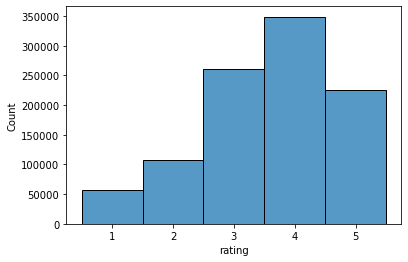

In [13]:
sns.histplot(data=r_u_m['rating'],bins='auto',discrete=True, kde=False, legend=True)

### Properties of 'ratings' in the data:
- Mean is **3.5815**
- Standard deviation is **1.1171**
- From the histogram plot it is clear that most of the ratings are 4 and 3 while the least number of ratings are 1.


In [14]:
f"We have {len(users.user_id.unique())} unique user ids in the data"

'We have 6040 unique user ids in the data'

### Gamma distribution:
- Performing a gamma distribution for ratings and using PDF (Probability Density Function).
- This PDF is for continuous data but the data we have is discrete so PDF is not a correct approach and hence using a poisson distribution for the data.

3.581564453029317
1.1171012869389083


Text(0, 0.5, 'Probability Density')

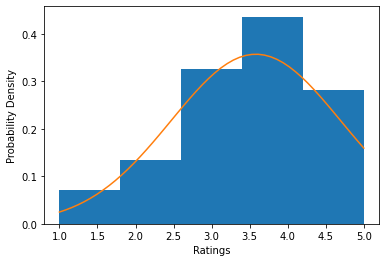

In [15]:
import numpy as np

data=r_u_m['rating']
plt.hist(data,bins=5,density=True)
[mean,std]=stats.norm.fit(data)
print(mean)
print(std)
x=np.linspace(np.min(data),np.max(data))
plt.plot(x,stats.norm.pdf(x,mean,std),)
plt.xlabel("Ratings")
plt.ylabel("Probability Density")

Mean

In [16]:
mu=data.mean()
mu

3.581564453029317

Median

In [17]:
data.median()

4.0

5 number summary

The five-number summary involves the calculation of 5 summary statistical quantities: namely:

- Median: The middle value in the sample, also called the 50th percentile or the 2nd quartile.
- 1st Quartile: The 25th percentile.
- 3rd Quartile: The 75th percentile.
- Minimum: The smallest observation in the sample.
- Maximum: The largest observation in the sample.

In [18]:
data.describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

- From above result it is clear that the **Median is 4.0, first quartile is 3.0, third quartile is 4.0, minimum is 1.0 and maximum is 5.0**.

Skew

In [19]:
data.skew()

-0.5536098874940055

- skewness is negative so our data is left skewed.

Kurtoisis

In [20]:
data.kurt()

-0.3519708031404183

- kurtosis is negative, so our distribution is flat distribution

Describe the type distribution and why?
- As the data is discrete, the suitable distribution is poisson as we can calculate the probability mass function.

### Poisson Distribution:
**Function**
<div style="font-size: 150%;">  
$$f(x; \lambda)=\frac{e^{-\lambda}\lambda^x}{x!}$$
</div>

**Parameters**
* $X=\{0,1,2,\ldots\}$
* $\lambda > 0$, where $\lambda$ is both the mean and the variance of X. $$E(X) = \text{Var}(X) = \lambda$$
* $e$ = 2.71828 


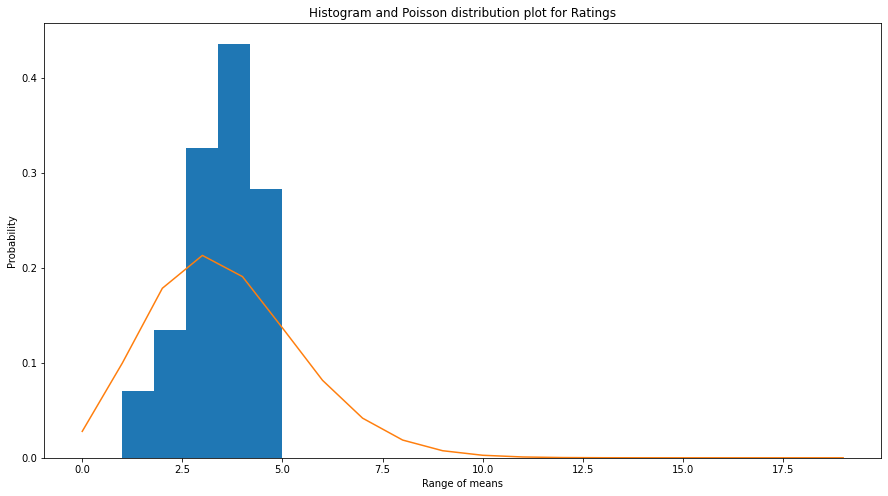

In [21]:
x = np.arange(0, 20, 1)                      # setting the x axis as range of means for the data
y = stats.poisson.pmf(x, mu=mu)              # calculating the probabilty mass function
plt.figure(figsize=(15,8))
plt.hist(data,bins=5,density=True)
plt.plot(x, y)                               # Plotting the graph for different mean values 
plt.xlabel('Range of means')
plt.ylabel('Probability')
plt.title('Histogram and Poisson distribution plot for Ratings')
plt.show()

In [22]:
# choosing action movies from the dataset
g_a = r_u_m.loc[r_u_m['genres'].str.contains('Action')]
g_a

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year,short_title
5904,1,1197,3,978302268,F,1,10,48067,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,1987,"Princess Bride, The"
5905,3,1197,5,978297570,M,25,15,55117,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,1987,"Princess Bride, The"
5906,10,1197,5,979167660,F,35,1,95370,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,1987,"Princess Bride, The"
5907,11,1197,5,978903297,F,25,1,04093,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,1987,"Princess Bride, The"
5908,13,1197,4,978201320,M,45,1,93304,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,1987,"Princess Bride, The"
...,...,...,...,...,...,...,...,...,...,...,...,...
1000183,5059,1434,4,962484364,M,45,16,22652,"Stranger, The (1994)",Action,1994,"Stranger, The"
1000184,5947,1434,4,957190428,F,45,16,97215,"Stranger, The (1994)",Action,1994,"Stranger, The"
1000193,5227,591,3,961475931,M,18,10,64050,Tough and Deadly (1995),Action|Drama|Thriller,1995,Tough and Deadly
1000194,5795,591,1,958145253,M,25,1,92688,Tough and Deadly (1995),Action|Drama|Thriller,1995,Tough and Deadly


In [23]:
data1=g_a['rating']

In [24]:
data1.describe()

count    257457.000000
mean          3.491185
std           1.133471
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [25]:
mu1=data1.mean()
mu1

3.4911849357368414

- Here mean is a float so the function can be continuous. 

In [26]:
sd1=data1.std()
sd1

1.133470953274303

Text(0, 0.5, 'Probability Density')

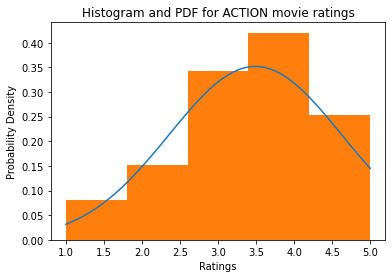

In [27]:
x1=np.linspace(np.min(data1),np.max(data1))
plt.plot(x1,stats.norm.pdf(x1,mu1,sd1))
plt.hist(data1,bins=5,density=True)
plt.title('Histogram and PDF for ACTION movie ratings')
plt.xlabel("Ratings")
plt.ylabel("Probability Density")

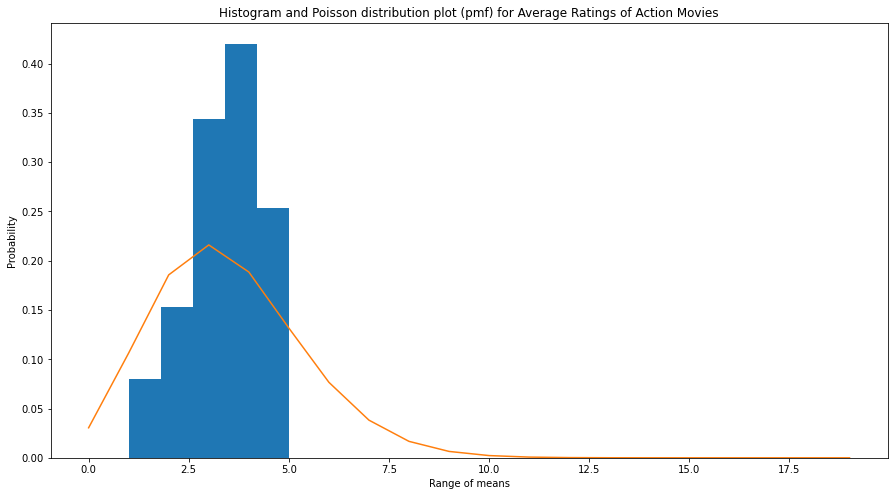

In [28]:
x = np.arange(0, 20, 1)                      # setting the x axis as range of means for the data
y = stats.poisson.pmf(x, mu=mu1)              # calculating the probabilty mass function
plt.figure(figsize=(15,8))
plt.hist(data1,bins=5,density=True)
plt.plot(x, y)                               # Plotting the graph for different mean values 
plt.xlabel('Range of means')
plt.ylabel('Probability')
plt.title('Histogram and Poisson distribution plot (pmf) for Average Ratings of Action Movies')
plt.show()

In [29]:
# choosing drama movies from the dataset
g_d = r_u_m.loc[r_u_m['genres'].str.contains('Drama')]
g_d

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year,short_title
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975,One Flew Over the Cuckoo's Nest
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1975,One Flew Over the Cuckoo's Nest
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1975,One Flew Over the Cuckoo's Nest
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1975,One Flew Over the Cuckoo's Nest
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1975,One Flew Over the Cuckoo's Nest
...,...,...,...,...,...,...,...,...,...,...,...,...
1000198,5334,127,1,960795494,F,56,13,46140,"Silence of the Palace, The (Saimt el Qusur) (1...",Drama,1994,"Silence of the Palace, The (Saimt el Qusur)"
1000199,5334,3382,5,960796159,F,56,13,46140,Song of Freedom (1936),Drama,1936,Song of Freedom
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama,1998,Broken Vessels
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama,1999,White Boys


In [30]:
data2=g_d['rating']

In [31]:
data2.describe()

count    354529.000000
mean          3.766332
std           1.045784
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [32]:
mu2=data2.mean()
mu2

3.766332232342065

In [33]:
sd2=data2.std()
sd2

1.0457838951876703

Text(0, 0.5, 'Probability Density')

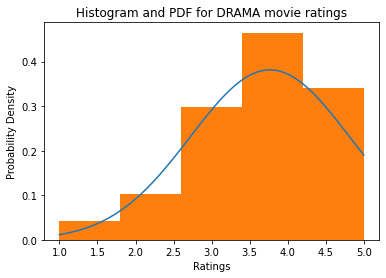

In [34]:
x2=np.linspace(np.min(data2),np.max(data2))
plt.plot(x2,stats.norm.pdf(x2,mu2,sd2))
plt.hist(data2,bins=5,density=True)
plt.title('Histogram and PDF for DRAMA movie ratings')
plt.xlabel("Ratings")
plt.ylabel("Probability Density")

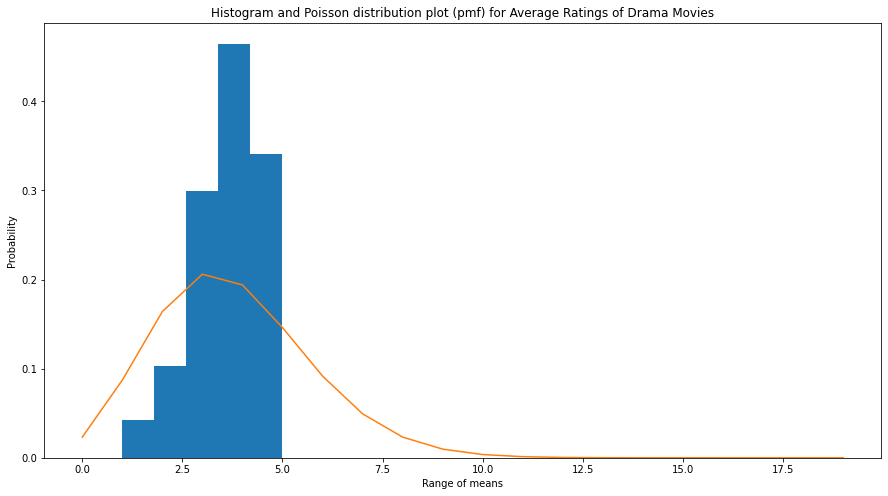

In [35]:
x = np.arange(0, 20, 1)                      # setting the x axis as range of means for the data
y = stats.poisson.pmf(x, mu=mu2)              # calculating the probabilty mass function
plt.figure(figsize=(15,8))
plt.hist(data2,bins=5,density=True)
plt.plot(x, y)                               # Plotting the graph for different mean values 
plt.xlabel('Range of means')
plt.ylabel('Probability')
plt.title('Histogram and Poisson distribution plot (pmf) for Average Ratings of Drama Movies')
plt.show()

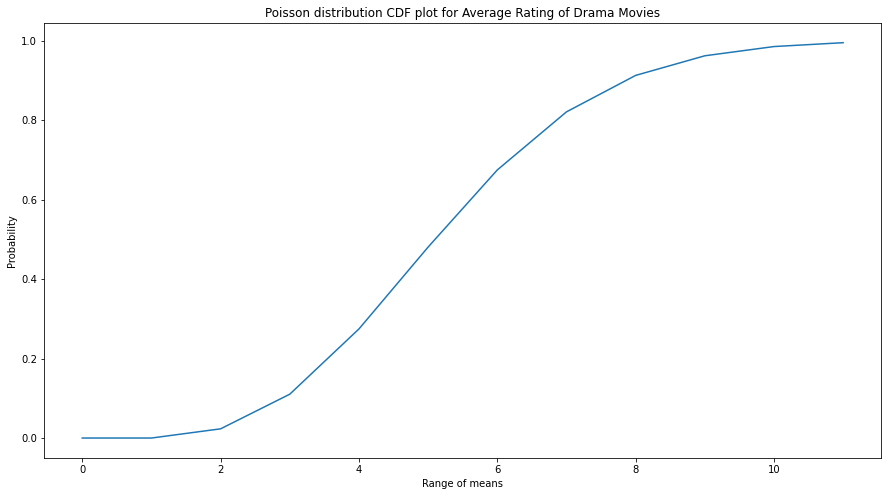

In [36]:
x = np.arange(0, 12, 1)                      
y = stats.poisson.cdf(x, mu=mu2,loc=sd2)               # calculating the cummulative distribution function
plt.figure(figsize=(15,8))
plt.plot(x, y)                               
plt.xlabel('Range of means')
plt.ylabel('Probability')
plt.title('Poisson distribution CDF plot for Average Rating of Drama Movies')
plt.show()

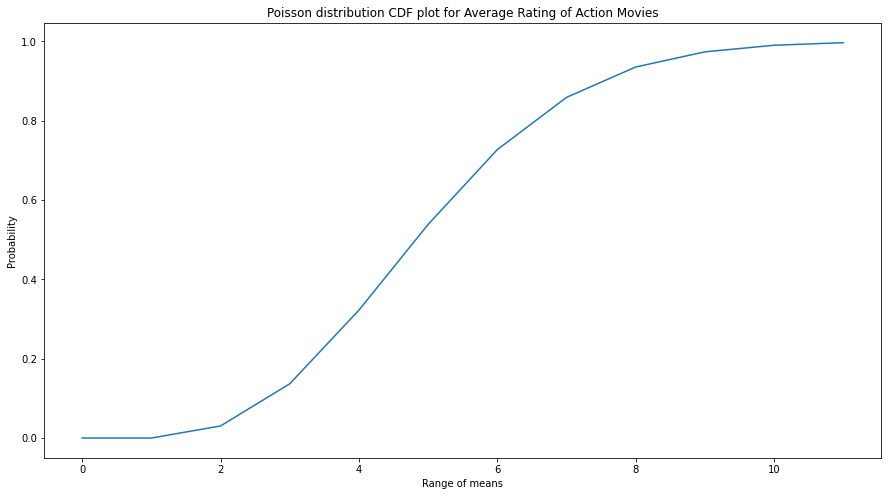

In [37]:
x = np.arange(0, 12, 1)                      
y = stats.poisson.cdf(x, mu=mu1,loc=sd1)              # calculating the cummulative distribution function
plt.figure(figsize=(15,8))
plt.plot(x, y)           
plt.xlabel('Range of means')
plt.ylabel('Probability')
plt.title('Poisson distribution CDF plot for Average Rating of Action Movies')
plt.show()

- The poisson distribution for the action movies VS drama movies is shown above. The distribution is similar to that of the whole movies data as the mean ratings for all of them is similar.

- As the mean and standard deviation are float values, we can consider a continuous function for our distribution such as pdf.

Histogram of ratings for genre action

<AxesSubplot:>

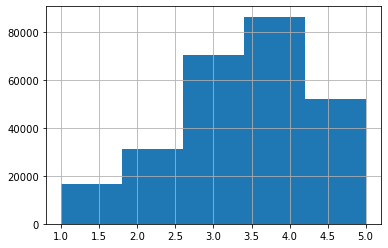

In [38]:
g_a['rating'].hist(bins=5)

Histogram of ratings for genre drama

<AxesSubplot:>

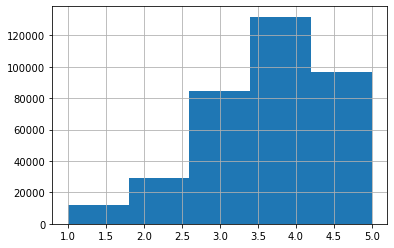

In [39]:
g_d['rating'].hist(bins=5)

#### Method of Moments

- Method of moments is the estimator for the next values in the data.
- The first method of moment is the mean. This moment tells where the data is present.
- The second method of moment is the variance. This moment tells us how the data is spread.
- The third moment tells us about the skewness.
- The fourth moment tells us about the kurtosis.
- For different estimates we look for the best fit curve for the data using the help of moment methods.

##### Drama

In [40]:
#mean is
mu2

3.766332232342065

In [41]:
# variance is
data2.std()**2
#data2.var()

1.0936639554338963

In [42]:
data2.skew()

-0.6712360470963978

In [43]:
data2.kurt()

-0.0600641322088058

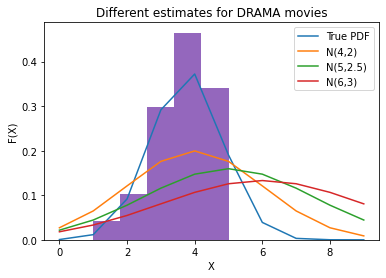

In [44]:
x2 = np.arange(0, 10, 1) 
plt.plot(x2,stats.norm.pdf(x2,mu2,sd2),label='True PDF')
plt.plot(x2,stats.norm.pdf(x2,4,2),label='N(4,2)')
plt.plot(x2,stats.norm.pdf(x2,5,2.5),label='N(5,2.5)')
plt.plot(x2,stats.norm.pdf(x2,6,3),label='N(6,3)')
plt.hist(data2,bins=5,density=True)
plt.title('Different estimates for DRAMA movies')
plt.xlabel("X")
plt.ylabel("F(X)")
plt.legend()

### PMF for the data

In [45]:
p1=stats.poisson.pmf(1, mu=mu2)
p2=stats.poisson.pmf(2, mu=mu2)
p3=stats.poisson.pmf(3, mu=mu2)
p4=stats.poisson.pmf(4, mu=mu2)
p5=stats.poisson.pmf(5, mu=mu2)
print("probability of getting rating as 1 is:",p1)
print("probability of getting rating as 2 is:",p2)
print("probability of getting rating as 3 is:",p3)
print("probability of getting rating as 4 is:",p4)
print("probability of getting rating as 5 is:",p5)

probability of getting rating as 1 is: 0.08714075561036275
probability of getting rating as 2 is: 0.1641005183029759
probability of getting rating as 3 is: 0.2060190238095124
probability of getting rating as 4 is: 0.1939840224623534
probability of getting rating as 5 is: 0.1461216552718658


### CDF for the data

In [46]:
p1=stats.poisson.cdf(1, mu=mu2,loc=sd2)
p2=stats.poisson.cdf(2, mu=mu2,loc=sd2)
p3=stats.poisson.cdf(3, mu=mu2,loc=sd2)
p4=stats.poisson.cdf(4, mu=mu2,loc=sd2)
p5=stats.poisson.cdf(5, mu=mu2,loc=sd2)
print("probability of getting rating as 1 is:",p1)
print("probability of getting rating as 2 is:",p2)
print("probability of getting rating as 3 is:",p3)
print("probability of getting rating as 4 is:",p4)
print("probability of getting rating as 5 is:",p5)

probability of getting rating as 1 is: 0.0
probability of getting rating as 2 is: 0.02313676814330714
probability of getting rating as 3 is: 0.11027752375366989
probability of getting rating as 4 is: 0.2743780420566459
probability of getting rating as 5 is: 0.48039706586615827


Plot the histogram distribution along with the estimator as shown in class.

##### Action

In [47]:
data1.mean()

3.4911849357368414

In [48]:
data1.var()

1.2847564019165572

In [49]:
data1.skew()

-0.47349607480461275

In [50]:
data1.kurt()

-0.4762327809178206

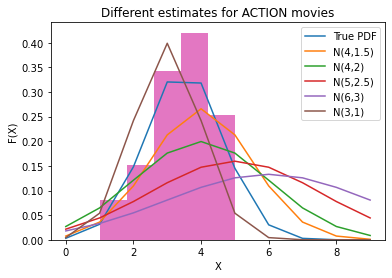

In [51]:
x2 = np.arange(0, 10, 1) 
plt.plot(x2,stats.norm.pdf(x2,mu1,sd1),label='True PDF')
plt.plot(x2,stats.norm.pdf(x2,4,1.5),label='N(4,1.5)')
plt.plot(x2,stats.norm.pdf(x2,4,2),label='N(4,2)')
plt.plot(x2,stats.norm.pdf(x2,5,2.5),label='N(5,2.5)')
plt.plot(x2,stats.norm.pdf(x2,6,3),label='N(6,3)')
plt.plot(x2,stats.norm.pdf(x2,3,1),label='N(3,1)')
plt.hist(data1,bins=5,density=True)
plt.title('Different estimates for ACTION movies')
plt.xlabel("X")
plt.ylabel("F(X)")
plt.legend()

#### Maximum Likelihood

##### Drama

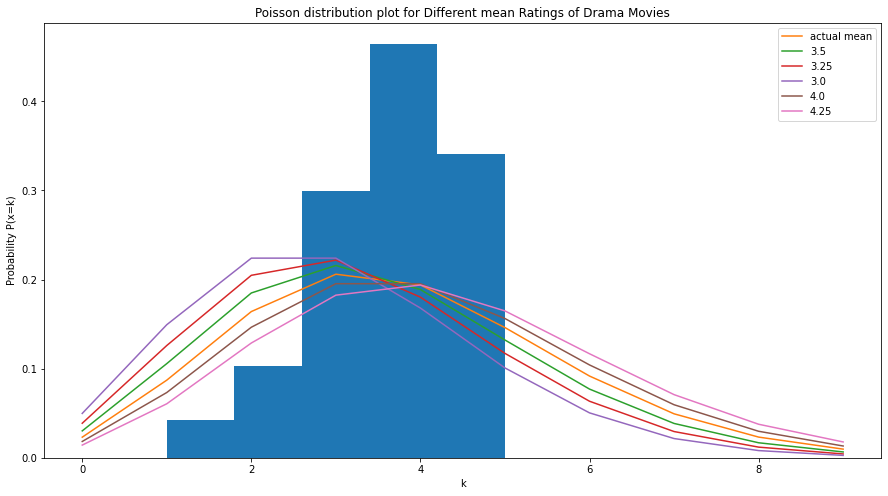

In [52]:
x = np.arange(0, 10, 1)                      # setting the x axis as range of means for the data
y = stats.poisson.pmf(x, mu=mu2)              # calculating the probabilty mass function
y1=stats.poisson.pmf(x,mu=3.5)
y2=stats.poisson.pmf(x,3.25)
y3=stats.poisson.pmf(x,3.0)
y4=stats.poisson.pmf(x,4.0)
y5=stats.poisson.pmf(x,4.25)
plt.figure(figsize=(15,8))
plt.hist(data2,bins=5,density=True)
a=plt.plot(x, y,label='actual mean')                               # Plotting the graph for different mean values 
b=plt.plot(x,y1,label=3.5)
c=plt.plot(x,y2,label=3.25)
d=plt.plot(x,y3,label=3.0)
e=plt.plot(x,y4,label=4.0)
f=plt.plot(x,y5,label=4.25)
plt.xlabel('k')
plt.ylabel('Probability P(x=k)')
plt.title('Poisson distribution plot for Different mean Ratings of Drama Movies')
plt.legend()
plt.show()

- The above plot shows the poisson distribution for different mean values. From method of moments estimate the best fit is for mean. So maximum likelihood estimate is the mean for drama movies data.

In [53]:
mu2

3.766332232342065

In [54]:
data2.std()

1.0457838951876703

In [55]:
mode2=data2.mode()
mode2

0    4
dtype: int64

- mode for the data is 4 that means most of the occurences is 4.0

##### Action

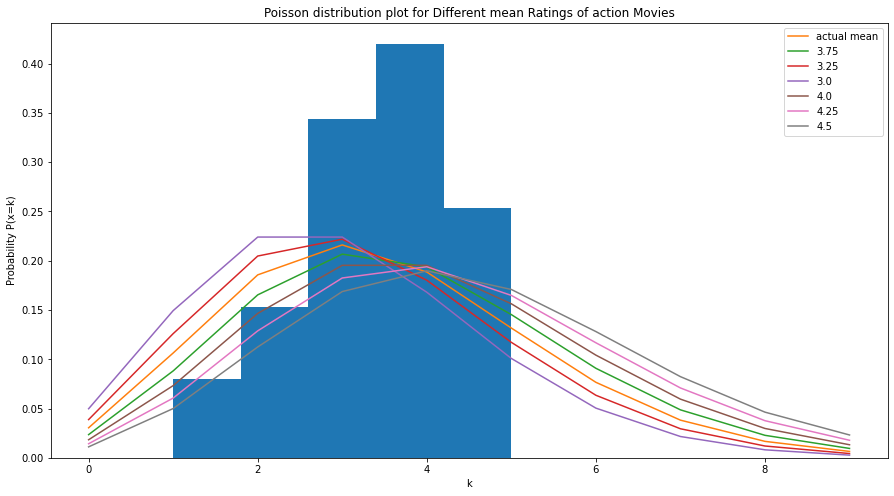

In [56]:
x = np.arange(0, 10, 1)                      # setting the x axis as range of means for the data
y = stats.poisson.pmf(x, mu=mu1)              # calculating the probabilty mass function
y1=stats.poisson.pmf(x,mu=3.75)
y2=stats.poisson.pmf(x,3.25)
y3=stats.poisson.pmf(x,3.0)
y4=stats.poisson.pmf(x,4.0)
y5=stats.poisson.pmf(x,4.25)
y6=stats.poisson.pmf(x,4.5)
plt.figure(figsize=(15,8))
plt.hist(data1,bins=5,density=True)
a=plt.plot(x, y,label='actual mean')                               # Plotting the graph for different mean values 
b=plt.plot(x,y1,label=3.75)
c=plt.plot(x,y2,label=3.25)
d=plt.plot(x,y3,label=3.0)
e=plt.plot(x,y4,label=4.0)
f=plt.plot(x,y5,label=4.25)
g=plt.plot(x,y6,label=4.5)
plt.xlabel('k')
plt.ylabel('Probability P(x=k)')
plt.title('Poisson distribution plot for Different mean Ratings of action Movies')
plt.legend()
plt.show()

- The above plot shows the poisson distribution for different mean values. From method of moments estimate the best fit is for mean. So maximum likelihood estimate is the mean for action movies data.

In [57]:
mu1

3.4911849357368414

In [58]:
sd1

1.133470953274303

#### KDE

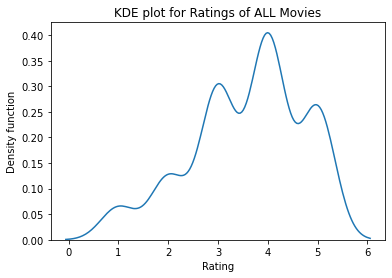

In [59]:
plt.figure()
sns.kdeplot(data=data,bw_adjust=5,legend=True)
plt.xlabel('Rating')
plt.ylabel('Density function')
plt.title('KDE plot for Ratings of ALL Movies')
plt.show()

##### Drama

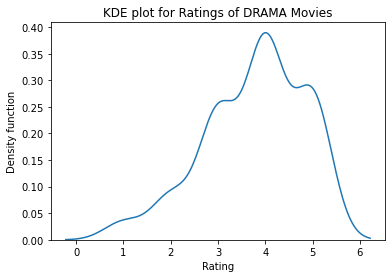

In [60]:
plt.figure()
sns.kdeplot(data=data2,bw_adjust=5,legend=True)
plt.xlabel('Rating')
plt.ylabel('Density function')
plt.title('KDE plot for Ratings of DRAMA Movies')
plt.show()

##### Action

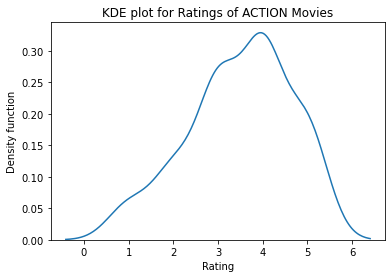

In [61]:
plt.figure()
sns.kdeplot(data=data1,bw_adjust=5,legend=True)
plt.xlabel('Rating')
plt.ylabel('Density function')
plt.title('KDE plot for Ratings of ACTION Movies')
plt.show()

- The above three plots are the KDE estimates for different data selected.
- The bandwith selected is 5 as we have 5 different values which are discrete.
- This KDE - Kernel Density Estimator is the estimate of the density of the data (probability density) for a given value of the data.
- The curve is active only for the values of 1 to 5 on x-axis as the ratings are from 1 to 5.